# imresize no domínio da frequência

Implementar uma função equivalente ao imresize do scipy, porém usando a interpolação 
no domínio da frequência

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys,os
import scipy
import skimage.transform
ia898path = os.path.abspath('/home/lotufo')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

In [2]:
def imresize(f, size):
    '''
    Resize an image
    Parameters
    ----------
        f: input image
        size: integer, float or tuple
            - integer: percentage of current size
            - float: fraction of current size
            - tuple: new dimensions
    Returns
    -------
        output image resized 
    '''
    H,W = f.shape
    if(type(size) is float): 
        G = np.zeros(((int)(H*size),(int)(W*size)),'complex128')
    elif(type(size) is int): 
        G = np.zeros(((int)(H*size/100),(int)(W*size/100)),'complex128')
    elif(type(size) is tuple):
        G = np.zeros(size,'complex128')
    
    F = np.fft.fft2(f)
    H,W = G.shape
     
    np.set_printoptions(precision=2)
    
    if(H%2==0):
        Hp = H//2
        Hn = H//2 - 1
    else:
        Hp = H//2 + 1
        Hn = H//2
        
    if(W%2==0):
        Wp = W//2
        Wn = W//2 - 1
    else:
        Wp = W//2 + 1
        Wn = W//2
    
    G[:Hp,:Wp] = F[:Hp,:Wp]
    G[-Hn:,:Wp]  = F[-Hn:,:Wp]
    G[:Hp,-Wn:]  = F[:Hp,-Wn:]    
    G[-Hn:,-Wn:] = F[-Hn:,-Wn:]
    
    return ia.normalize(np.fft.ifft2(G).real)

In [3]:
testing = (__name__ == '__main__')

if testing:
    import sys,os
    ! jupyter nbconvert --to 'python' imresize

    path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_10/')
    if path not in sys.path:
        sys.path.append(path)
    import imresize as imrsz

[NbConvertApp] Converting notebook imresize.ipynb to python
[NbConvertApp] Writing 4396 bytes to imresize.py


In [4]:
if testing:
    f = mpimg.imread('/home/lotufo/ia898/data/gull.pgm')
    r,c = np.indices(f.shape)
    y = ia.normalize(r == c*2 - 150)
    f = np.maximum(f, y)
    y = ia.normalize(r == c*2 - 151)
    f = np.maximum(f, y)
    y = ia.normalize(r == c*2 - 152)
    f = np.maximum(f, y)

f shape: (256, 256)
imresize shape: (179, 178)
scipy.imresize: (179, 178)


""
Imagem original
""
imresize
""
scipy.imresize

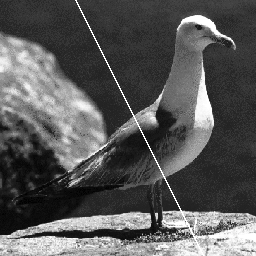
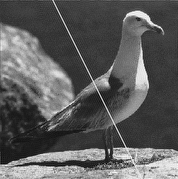
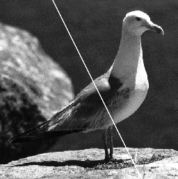

""
Espectro original
""
imresize
""
scipy.imresize

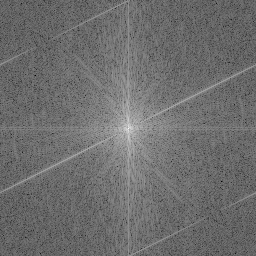
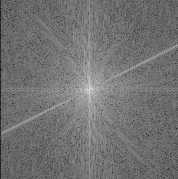
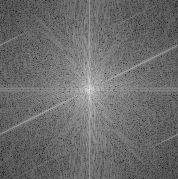

In [5]:
if testing:
    # Testing tupla 
    scale = (179,178)

    g = imrsz.imresize(f, scale)
    g2 = scipy.misc.imresize(f,scale)

    print('f shape:', f.shape)
    print('imresize shape:', g.shape)
    print('scipy.imresize:', g2.shape)

    nb = ia.nbshow(3)
    nb.nbshow(f, 'Imagem original')
    nb.nbshow(g, 'imresize' )
    nb.nbshow(g2, 'scipy.imresize')

    nb.nbshow()

    nb = ia.nbshow(4)
    nb.nbshow(ia.dftview(np.fft.fft2(f)) , 'Espectro original')
    nb.nbshow(ia.dftview(np.fft.fft2(g)), 'imresize')
    nb.nbshow(ia.dftview(np.fft.fft2(g2)), 'scipy.imresize')

    nb.nbshow()


f shape: (256, 256)
imresize shape: (128, 128)
scipy.imresize: (128, 128)


""
Imagem original
""
imresize
""
scipy.imresize

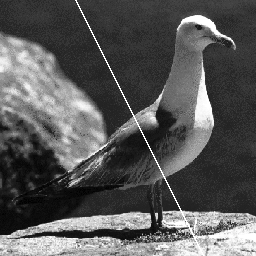
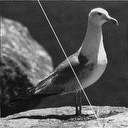
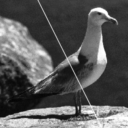

""
Espectro original
""
imresize
""
scipy.imresize

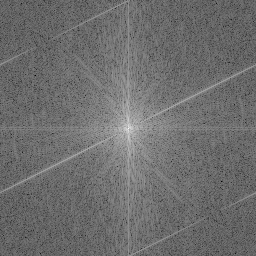
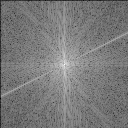
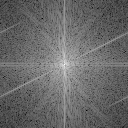

In [6]:
if testing:
    # Testing integer 
    scale = 50

    g = imrsz.imresize(f, scale)
    g2 = scipy.misc.imresize(f,scale)

    print('f shape:', f.shape)
    print('imresize shape:', g.shape)
    print('scipy.imresize:', g2.shape)

    nb = ia.nbshow(3)
    nb.nbshow(f, 'Imagem original')
    nb.nbshow(g, 'imresize' )
    nb.nbshow(g2, 'scipy.imresize')
    nb.nbshow()

    nb = ia.nbshow(4)
    nb.nbshow(ia.dftview(np.fft.fft2(f)) , 'Espectro original')
    nb.nbshow(ia.dftview(np.fft.fft2(g)), 'imresize')
    nb.nbshow(ia.dftview(np.fft.fft2(g2)), 'scipy.imresize')

    nb.nbshow()


f shape: (256, 256)
imresize shape: (69, 69)
scipy.imresize: (69, 69)


""
Imagem original
""
imresize
""
scipy.imresize

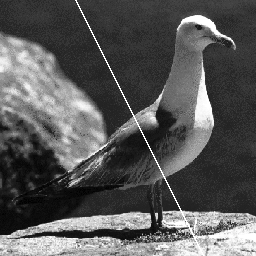
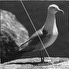
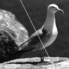

""
Espectro original
""
imresize
""
scipy.imresize

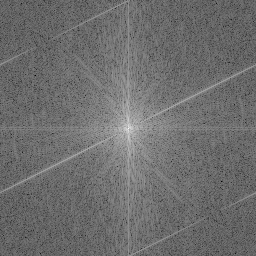
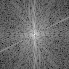
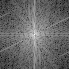

In [7]:
if testing:
    # Testing float
    scale = 0.27

    g = imrsz.imresize(f, scale)
    g2 = scipy.misc.imresize(f,scale)

    print('f shape:', f.shape)
    print('imresize shape:', g.shape)
    print('scipy.imresize:', g2.shape)

    nb = ia.nbshow(3)
    nb.nbshow(f, 'Imagem original')
    nb.nbshow(g, 'imresize' )
    nb.nbshow(g2, 'scipy.imresize')
    nb.nbshow()

    nb = ia.nbshow(4)
    nb.nbshow(ia.dftview(np.fft.fft2(f)) , 'Espectro original')
    nb.nbshow(ia.dftview(np.fft.fft2(g)), 'imresize')
    nb.nbshow(ia.dftview(np.fft.fft2(g2)), 'scipy.imresize')

    nb.nbshow()

In [8]:
if testing:
    # Peformance test
    print('-------------------------------------------\n')
    print('imresize:\n')
    %timeit imresize(f,scale)
    print('\n-------------------------------------------\n')
    print('scipy.imresize:\n')
    %timeit scipy.misc.imresize(f,scale)
    print('\n-------------------------------------------')

-------------------------------------------

imresize:

100 loops, best of 3: 3.53 ms per loop

-------------------------------------------

scipy.imresize:

1000 loops, best of 3: 405 µs per loop

-------------------------------------------
